In [5]:
!pip install scipy
!pip install pydicom
!pip install numpy scikit-image

import os # for file-handling
import numpy as np # maths
import matplotlib.pyplot as plt # plotting
from scipy import ndimage # image processing
from pydicom import dcmread # reading DICOM files

dcm_slice1 = dcmread("/opt/google/drive/dicom_data/Co-RegisteredMask_GotzeBettina.dcm") # make sure you have the correct path
# convert it to numpy array for plotting the image
img1 = np.array(dcm_slice1.pixel_array)


dcm_slice2 = dcmread("/opt/google/drive/dicom_data/Automatic_Co_RegisteredMask_GotzeBettina.dcm") # make sure you have the correct path
# convert it to numpy array for plotting the image
img2 = np.array(dcm_slice2.pixel_array)

dcm_slice3 = dcmread("/opt/google/drive/dicom_data/Slice_GotzeBettina.dcm") # make sure you have the correct path
# convert it to numpy array for plotting the image
img3 = np.array(dcm_slice3.pixel_array)

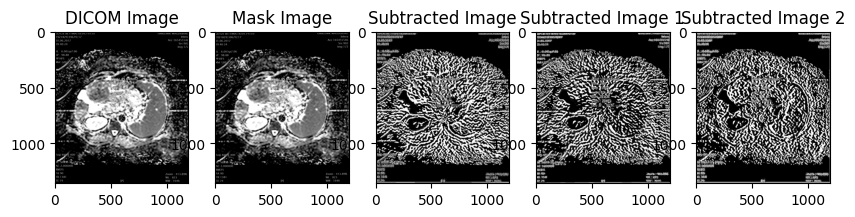

In [4]:
subtracted_image_1 = img3 - img2
subtracted_image_2= img3 - img1
subtracted_image = img2 - img1

# Display the original DICOM, mask, and subtracted images for comparison
plt.figure(figsize=(10, 5))

plt.subplot(1, 5, 1)
plt.imshow(img1, cmap='gray')
plt.title('DICOM Image')

plt.subplot(1, 5, 2)
plt.imshow(img2, cmap='gray')
plt.title('Mask Image')

plt.subplot(1, 5, 3)
plt.imshow(subtracted_image, cmap='gray')  # Adjust the colormap range based on your data
plt.title('Subtracted Image')

plt.subplot(1, 5, 4)
plt.imshow(subtracted_image_1, cmap='gray')  # Adjust the colormap range based on your data
plt.title('Subtracted Image 1')

plt.subplot(1, 5, 5)
plt.imshow(subtracted_image_2, cmap='gray')  # Adjust the colormap range based on your data
plt.title('Subtracted Image 2')

plt.show()

In [8]:
import numpy as np
from skimage.metrics import structural_similarity as ssim

# Assuming you have two co-registered images: registered_dicom_image and registered_mask_image
# ...

# Convert images to numpy arrays
array_dicom = img3
array_mask = img2
array_mask_manual= img1

# Calculate SSIM
ssim_index, _ = ssim(array_dicom, array_mask, full=True)
ssim_index_1, _= ssim(array_dicom, array_mask_manual, full=True)


# Print the SSIM index
print("Structural Similarity Index (SSIM): {:.4f}".format(ssim_index))
print("Structural Similarity Index (SSIM): {:.4f}".format(ssim_index_1))



Structural Similarity Index (SSIM): 0.8457
Structural Similarity Index (SSIM): 0.9225
